<a href="https://colab.research.google.com/github/SriTapasyaAlapati2511/Assignment/blob/main/Another_copy_of_AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd
import cv2

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Dinosaurs'
topic2 = 'Flamingos'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('de')

de1 = wikipedia.page(topic1).content
de2 = wikipedia.page(topic2).content

This is what the text looks like:

In [ ]:
fr2

"Le Lion (Panthera leo) est une espèce de mammifères carnivores de la famille des Félidés. La femelle du lion est la lionne, son petit est le lionceau. Le mâle adulte, aisément reconnaissable à son importante crinière, accuse une masse moyenne qui peut être variable selon les zones géographiques où il se trouve, allant de 145 à 180 kg pour les lions d'Asie à plus de 225 kg pour les lions d'Afrique. Certains spécimens très rares peuvent dépasser exceptionnellement 300 kg. Un mâle adulte se nourrit de 7 kg de viande chaque jour contre 5 kg chez la femelle. Le lion est un animal grégaire, c'est-à-dire qu'il vit en larges groupes familiaux, contrairement aux autres félins. Son espérance de vie, à l'état sauvage, est comprise entre 7 et 12 ans pour le mâle et 14 à 20 ans pour la femelle, mais il dépasse fréquemment les 30 ans en captivité.\nLe lion mâle ne chasse qu'occasionnellement, il est chargé de combattre les intrusions sur le territoire et les menaces contre la troupe. Le lion rugit.

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in German also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
de1 = cleanup(de1)
de2 = cleanup(de2)

In [ ]:
print(eng1)

dinosaursareadiversegroupofreptilesofthecladedinosauriatheyfirstappearedduringthetriassicperiodbetweenandmillionyearsagomyaalthoughtheexactoriginandtimingoftheevolutionofdinosaursisasubjectofactiveresearchtheybecamethedominantterrestrialvertebratesafterthetriassicjurassicextinctioneventmyaandtheirdominancecontinuedthroughoutthejurassicandcretaceousperiodsthefossilrecordshowsthatbirdsarefeathereddinosaurshavingevolvedfromearliertheropodsduringthelatejurassicepochandaretheonlydinosaurlineageknowntohavesurvivedthecretaceouspaleogeneextinctioneventapproximatelymyadinosaurscanthereforebedividedintoaviandinosaursbirdsandtheextinctnonaviandinosaurswhicharealldinosaursotherthanbirdsdinosaursarevariedfromtaxonomicmorphologicalandecologicalstandpointsbirdsatoverlivingspeciesareamongthemostdiversegroupsofvertebratesusingfossilevidencepaleontologistshaveidentifiedoverdistinctgeneraandmorethandifferentspeciesofnonaviandinosaursdinosaursarerepresentedoneverycontinentbybothextantspeciesbirdsandfossil

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and German pages. Can you spot a difference?

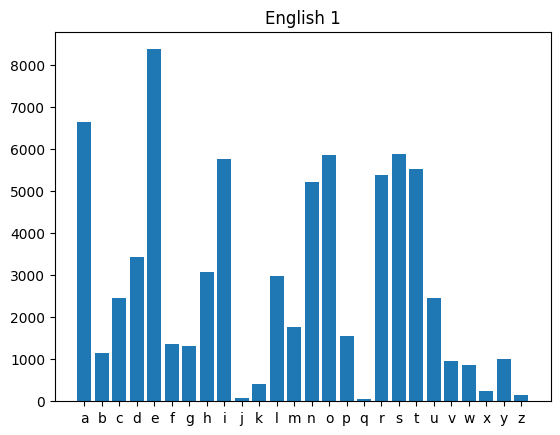

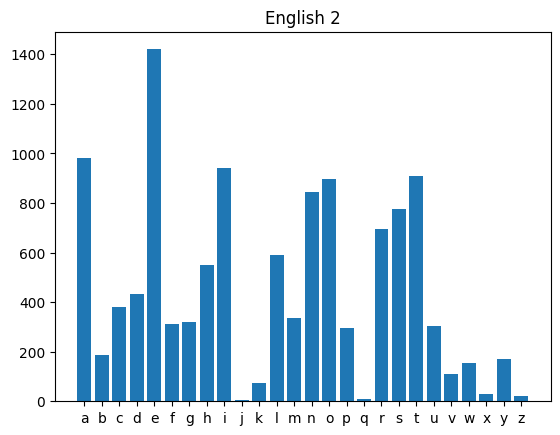

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

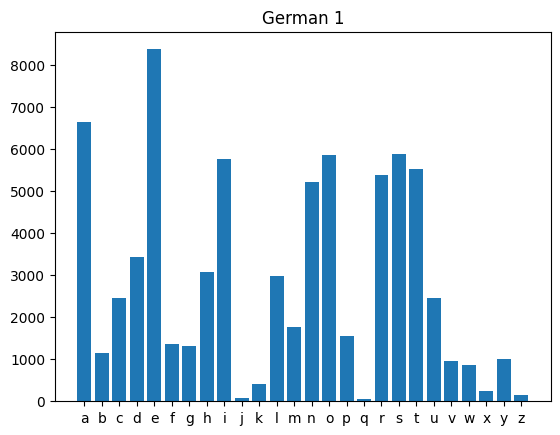

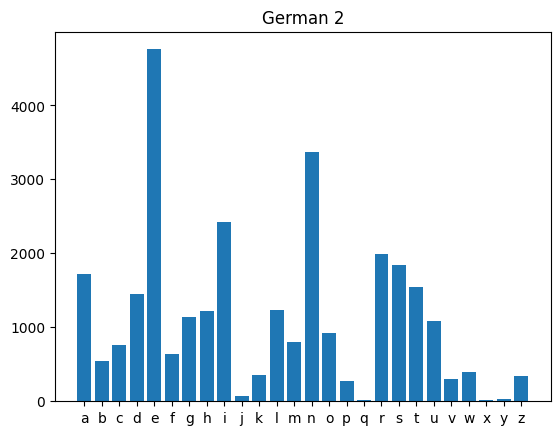

In [ ]:
unigram_de1 = Counter(ngrams(de1,1))
plothistogram(unigram_eng1)
plt.title('German 1')
plt.show()
unigram_de2 = Counter(ngrams(de2,1))
plothistogram(unigram_de2)
plt.title('German 2')
plt.show()

We can see that the unigrams for German and English are very similar. So this is not a good feature if we want to distinguish between German and French. Let us look at bigrams.

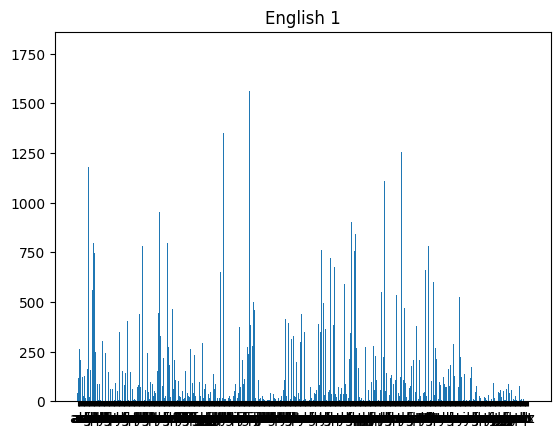

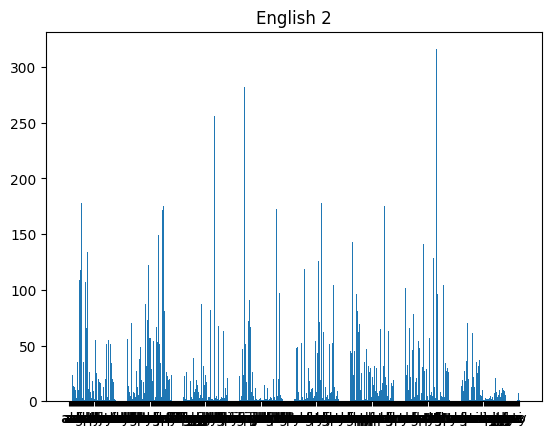

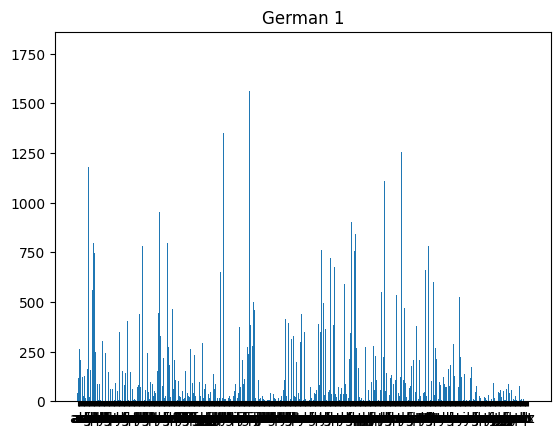

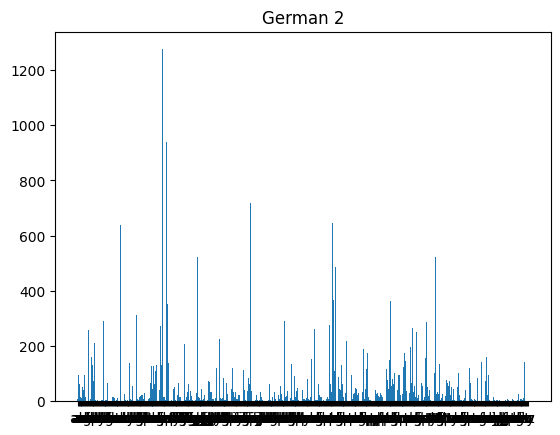

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_de1 = Counter(ngrams(de1,2))
plothistogram(bigram_eng1)
plt.title('German 1')
plt.show()

bigram_de2 = Counter(ngrams(de2,2))
plothistogram(bigram_de2)
plt.title('German 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

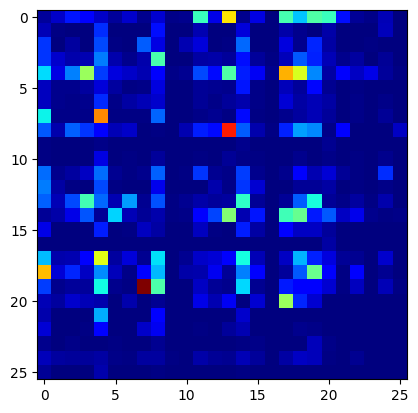

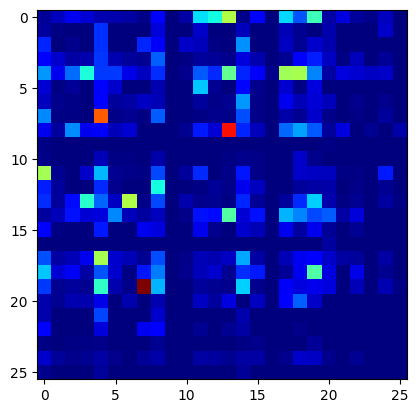

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

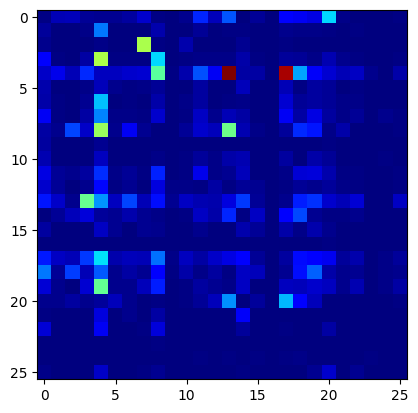

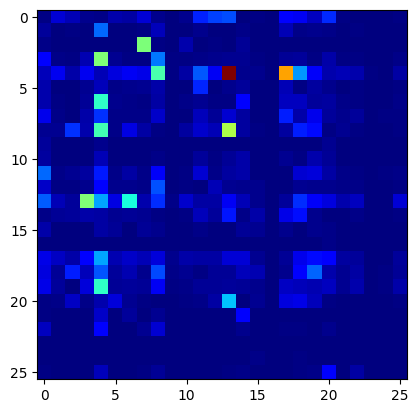

In [ ]:
bide1 = plotbihistogram(bigram_de1)
plt.show()
bide2 = plotbihistogram(bigram_de2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nGerman 1:')
ShowTopN(bide1)
print('\nGerman 2:')
ShowTopN(bide2)


English 1:
('t', 'h') : 1772.0
('i', 'n') : 1564.0
('h', 'e') : 1353.0
('e', 'r') : 1280.0
('s', 'a') : 1254.0
('a', 'n') : 1180.0
('r', 'e') : 1107.0
('e', 's') : 1083.0
('u', 'r') : 951.0
('e', 'd') : 951.0

English 2:
('t', 'h') : 316.0
('i', 'n') : 282.0
('h', 'e') : 256.0
('n', 'g') : 178.0
('a', 'n') : 178.0
('e', 's') : 175.0
('r', 'e') : 175.0
('l', 'a') : 173.0
('e', 'r') : 172.0
('e', 'n') : 149.0

German 1:
('e', 'n') : 2299.0
('e', 'r') : 2214.0
('d', 'e') : 1288.0
('c', 'h') : 1278.0
('i', 'e') : 1235.0
('i', 'n') : 1113.0
('n', 'd') : 1088.0
('t', 'e') : 1081.0
('e', 'i') : 1057.0
('r', 'e') : 798.0

German 2:
('e', 'n') : 1275.0
('e', 'r') : 940.0
('i', 'n') : 717.0
('d', 'e') : 647.0
('n', 'd') : 646.0
('c', 'h') : 640.0
('e', 'i') : 558.0
('i', 'e') : 552.0
('t', 'e') : 521.0
('g', 'e') : 521.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [ ]:
no0 = train_X[train_y==2,:,:]
no1 = train_X[train_y==3,:,:]
no2 = train_X[train_y==4,:,:]
no3 = train_X[train_y==5,:,:]

Let us visualize a few images here:

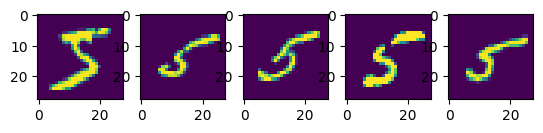

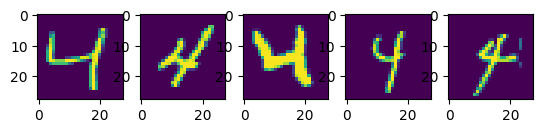

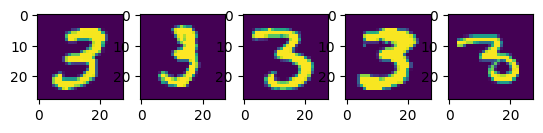

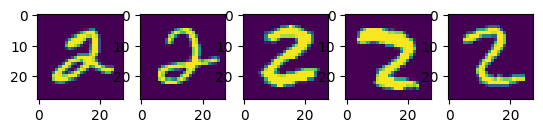

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no3[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no2[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum3 = np.sum(no3>0, (1,2))
sum2 = np.sum(no2>0, (1,2))
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

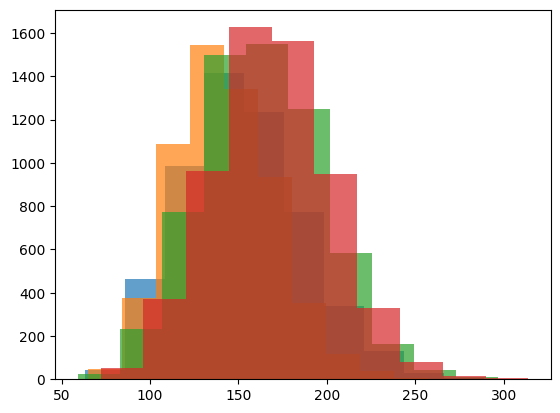

In [ ]:
plt.hist(sum3, alpha=0.7);
plt.hist(sum2, alpha=0.7);
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

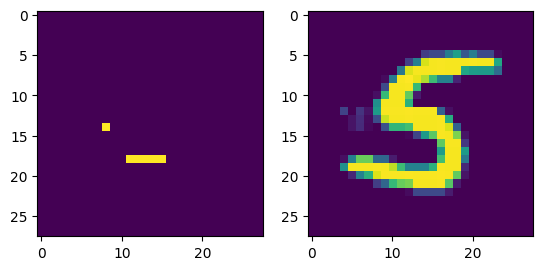

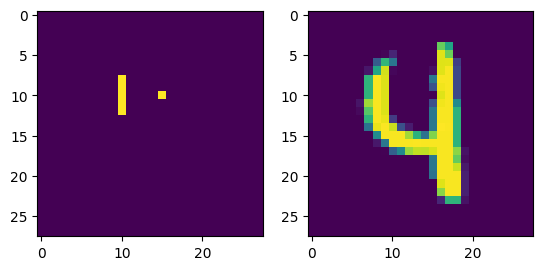

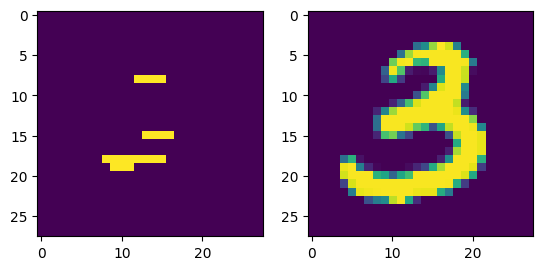

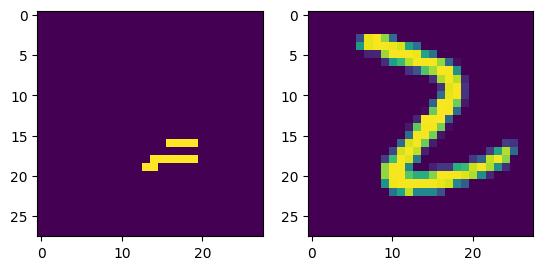

In [ ]:
imgs = [no3[456,:,:],  no2[456,:,:],  no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

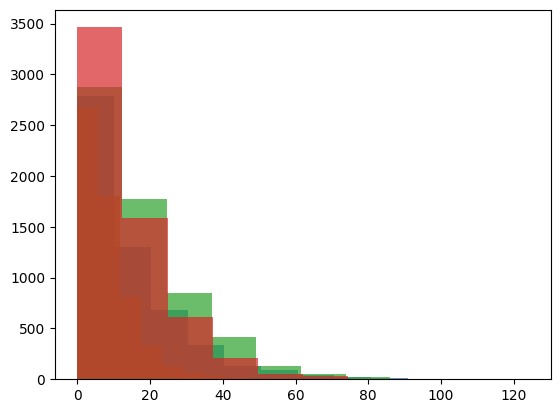

In [ ]:
hole3 = np.array([getHolePixels(i).sum() for i in no3])
hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
plt.hist(hole3, alpha=0.7);
plt.hist(hole2, alpha=0.7);
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

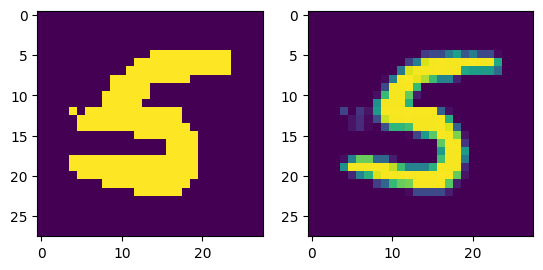

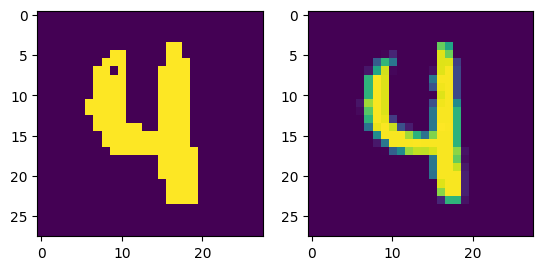

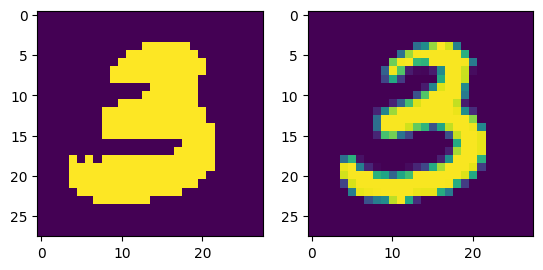

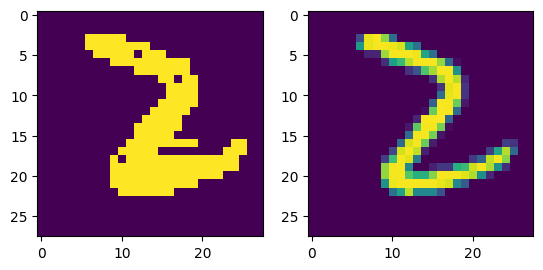

In [ ]:
imgs = [no3[456,:,:],  no2[456,:,:],  no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

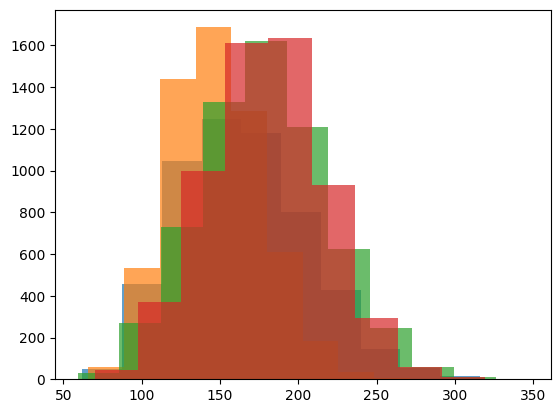

In [ ]:
hull3 = np.array([getHullPixels(i).sum() for i in no3])
hull2 = np.array([getHullPixels(i).sum() for i in no2])
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull3, alpha=0.7);
plt.hist(hull2, alpha=0.7);
plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

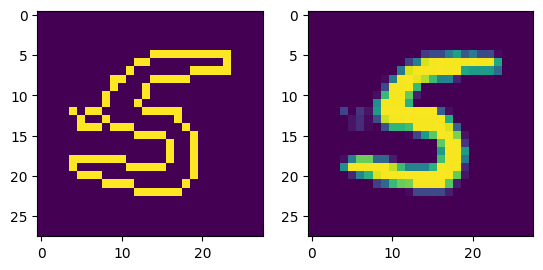

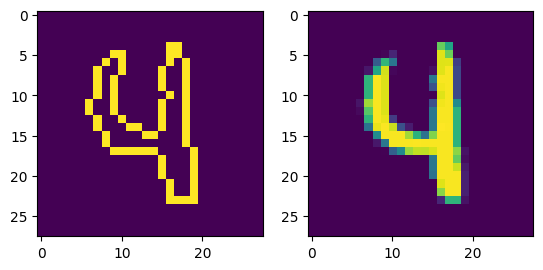

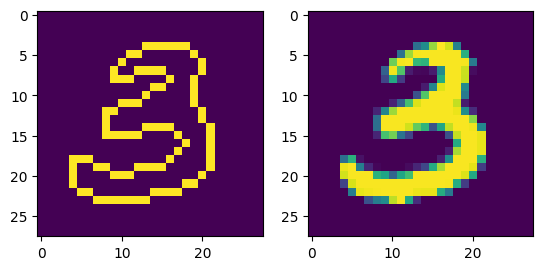

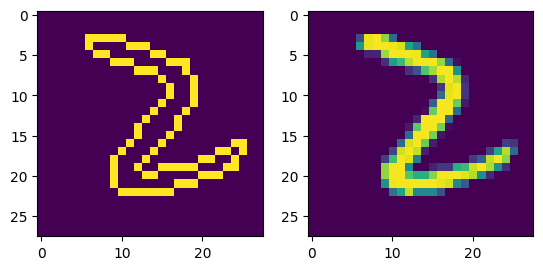

In [ ]:
imgs = [no3[456,:,:],  no2[456,:,:],  no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

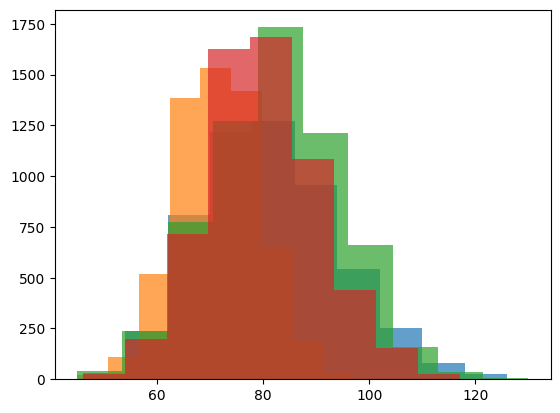

In [ ]:
bound3 = np.array([getBoundaryPixels(i).sum() for i in no3])
bound2= np.array([getBoundaryPixels(i).sum() for i in no2])
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound3, alpha=0.7);
plt.hist(bound2, alpha=0.7);
plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

(array([3.000e+00, 5.900e+01, 1.423e+03, 3.120e+03, 1.086e+03, 1.750e+02,
        6.900e+01, 2.000e+01, 2.000e+00, 1.000e+00]),
 array([0.07692308, 0.31923077, 0.56153846, 0.80384615, 1.04615385,
        1.28846154, 1.53076923, 1.77307692, 2.01538462, 2.25769231,
        2.5       ]),
 <BarContainer object of 10 artists>)

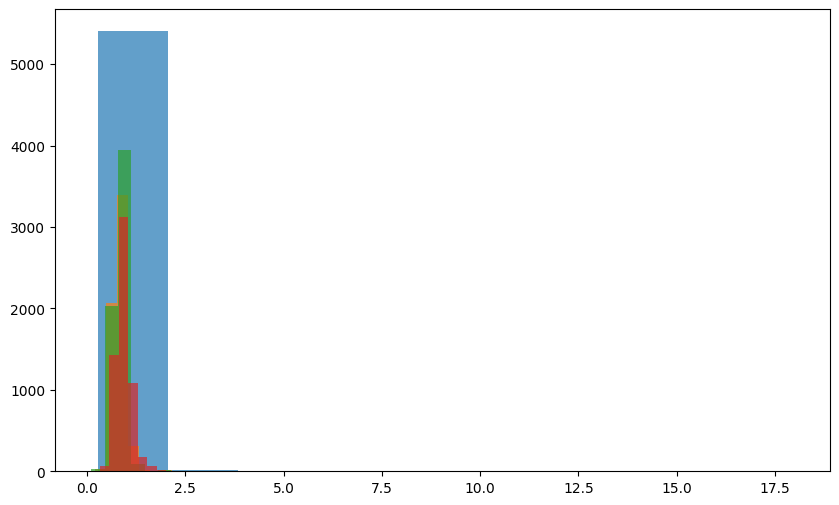

In [ ]:
def getAspectRatio(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])
        if h != 0:
            aspect_ratio = float(w) / h
            return aspect_ratio
    return 0
ratio3 = np.array([getAspectRatio(i) for i in no3])
ratio2 = np.array([getAspectRatio(i) for i in no2])
ratio1 = np.array([getAspectRatio(i) for i in no1])
ratio0 = np.array([getAspectRatio(i) for i in no0])
plt.figure(figsize=(10, 6))

plt.hist(ratio3, alpha=0.7, label='Aspect Ratio no3')
plt.hist(ratio2, alpha=0.7, label='Aspect Ratio no2')
plt.hist(ratio1, alpha=0.7, label='Aspect Ratio no1')
plt.hist(ratio0, alpha=0.7, label='Aspect Ratio no0')



What will happen if we plot two features together?(only a few combinations are done)

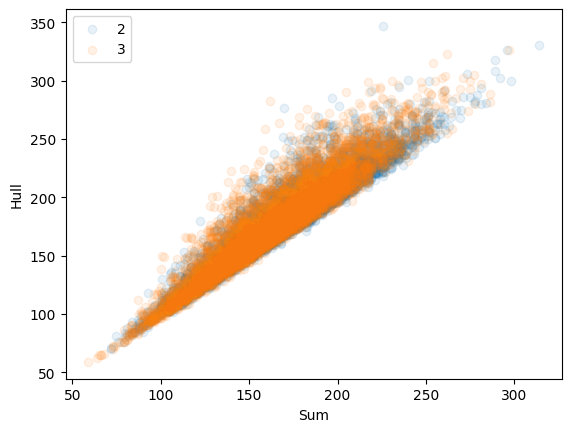

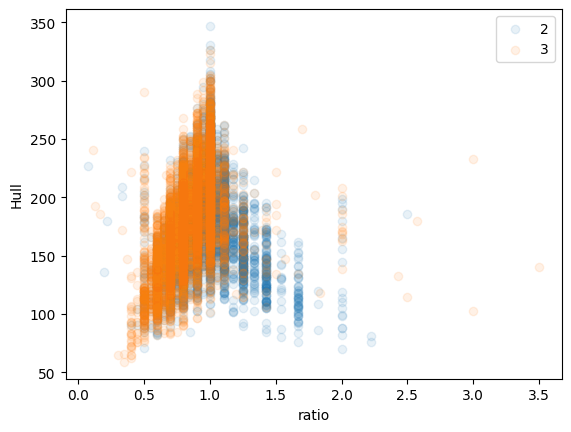

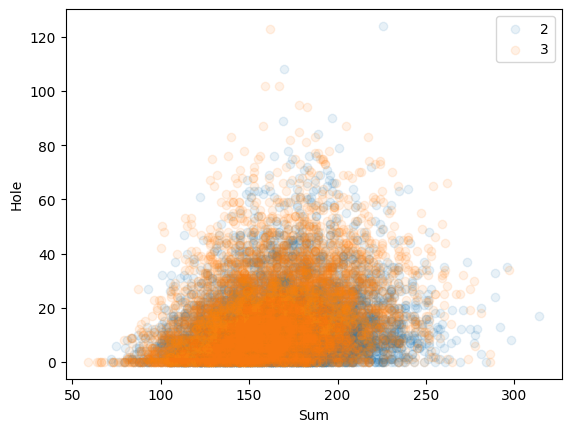

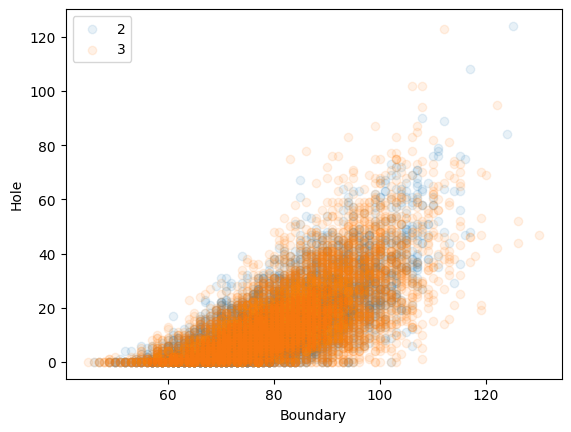

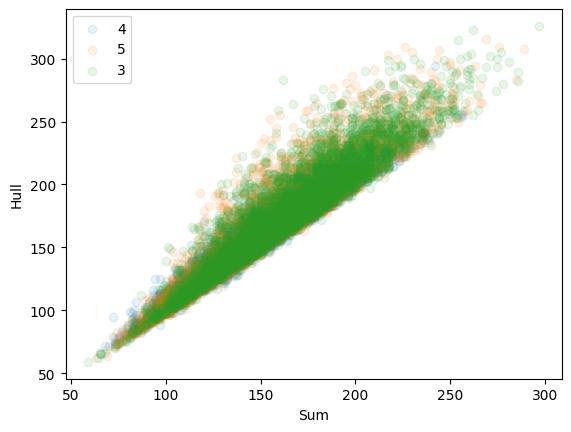

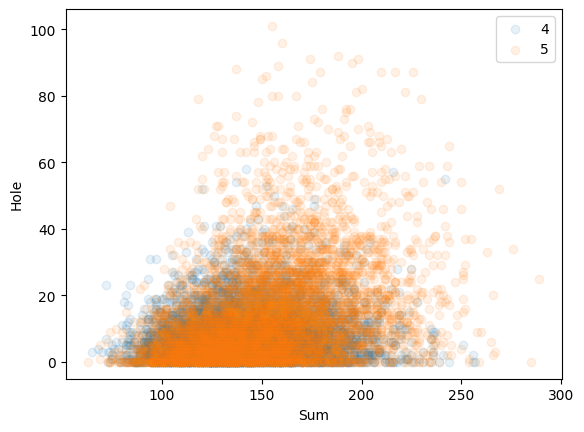

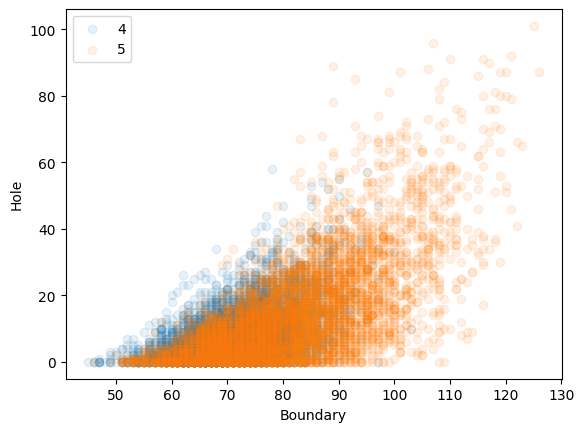

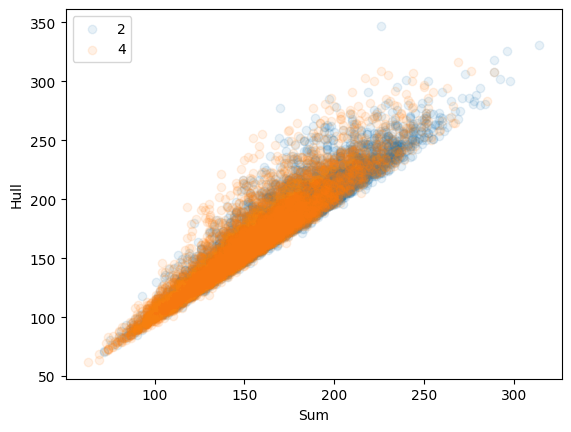

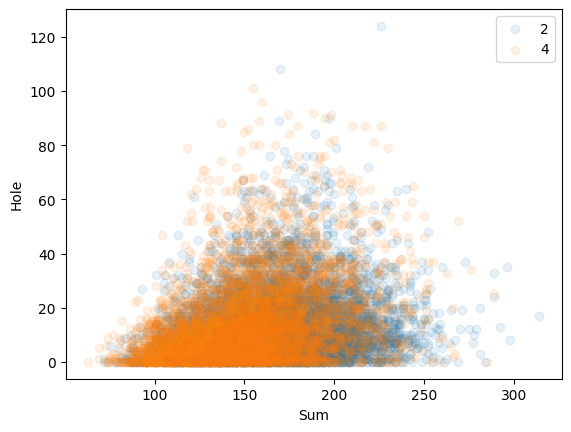

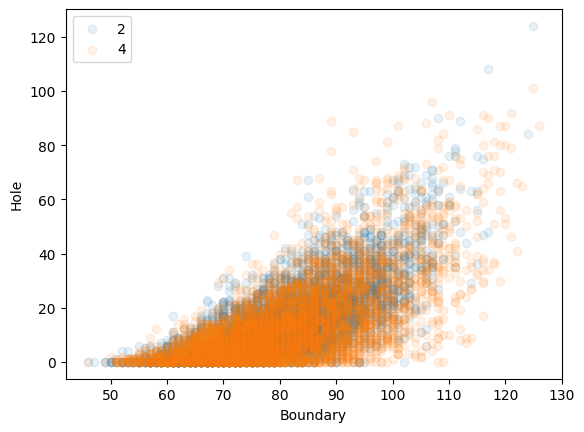

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['2','3'])
plt.show()

#ratio and hull
plt.scatter(ratio0, hull0, alpha=0.1)
plt.scatter(ratio1, hull1, alpha=0.1)
plt.xlabel('ratio')
plt.ylabel('Hull')
plt.legend(['2','3'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['2','3'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['2','3'])
plt.show()


# Sum and hull
plt.scatter(sum2, hull2, alpha=0.1)
plt.scatter(sum3, hull3, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['4','5','3'])
plt.show()

# Sum and hole
plt.scatter(sum2, hole2, alpha=0.1)
plt.scatter(sum3, hole3, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['4','5'])
plt.show()

# Hole and boundary
plt.scatter(bound2, hole2, alpha=0.1)
plt.scatter(bound3, hole3, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['4','5'])
plt.show()

# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum3, hull3, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['2','4'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum3, hole3, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['2','4'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound3, hole3, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['2','4'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 3']*len(sum1)
cl0 = ['class 2']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

In [ ]:
cl1 = ['class 3']*len(sum1)
cl0 = ['class 2']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((ratio1,ratio0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Ratio', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Ratio', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?